potentially useful notes:
  * examples for likelihood for different distributions [download here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiXj_vWzqz1AhVR14UKHauzDIsQFnoECAUQAQ&url=https%3A%2F%2Fosf.io%2Faqcjh%2Fdownload&usg=AOvVaw1d71Q2WO9DNEG3q0wBnrbk)  
  * derivation of KL-divergence and likelihood relation [here](https://arxiv.org/pdf/1404.2000.pdf)

In [1]:
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# numpy random number generator (RNG)
rng = np.random.default_rng()

In [3]:
# binomial distribution parameters
n = 10
p = 0.35
N = 1000

In [4]:
data_binomial = rng.binomial(n=n,p=p,size=N)

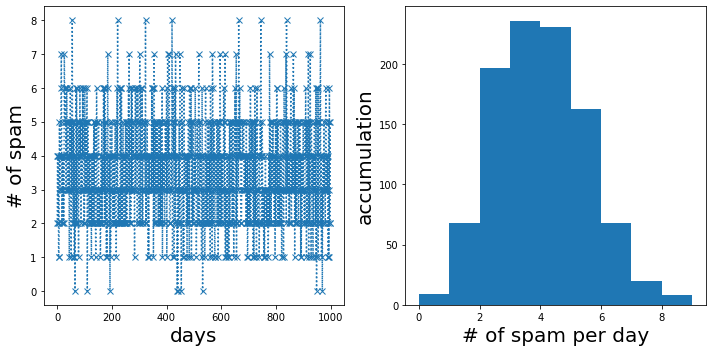

In [5]:
# obtain samples from binomial distribution


fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(data_binomial,"x:")
ax.set_xlabel("days", fontsize=20)
ax.set_ylabel("# of spam", fontsize=20)

ax = axs[1]
ax.hist(data_binomial, bins=np.arange(n))
ax.set_xlabel("# of spam per day", fontsize=20)
ax.set_ylabel("accumulation", fontsize=20)

plt.tight_layout()

plt.savefig("binomial_ex_time-distribution.png", bbox_inches='tight')

Now in this case *we know* that the underlying probability distribution is a binomial distribution
$$
p_\theta(x) = \binom{n}{x} \theta^x (1- \theta)^{n-x}
$$

In [6]:
def binomial_distribution(theta,n,x):
    return scipy.special.binom(n,x) * theta**x * (1 - theta)**(n-x)

We can obtain the optimal value of theta from the data by minimizing the loglikelihood $LL$
$$
\min_\theta \frac{1}{n} \sum_i -\log p_\theta(x^{(i)})
$$

In [7]:
def LL(data, theta, dstr, n=n):
    return (1/N) * np.sum([np.log(dstr(theta, n, x)) for x in data])

<ipython-input-7-cbe38605f419>:2: RuntimeWarning: divide by zero encountered in log
  return (1/N) * np.sum([np.log(dstr(theta, n, x)) for x in data])


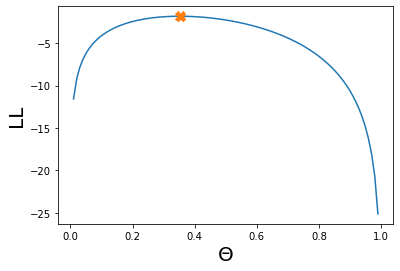

In [8]:
thetas = np.linspace(0,1,100)
LLs = [LL(data_binomial, theta, binomial_distribution) for theta in thetas]
plt.plot(thetas, LLs)
plt.plot(thetas[np.argmax(LLs)],np.max(LLs),"X",markersize=10)
plt.xlabel("$\Theta$", fontsize=20)
plt.ylabel("LL", fontsize=20)
plt.savefig("binomial_ex_LL-vs-theta.png", bbox_inches='tight')

How good is the fit?

In [9]:
thetas[np.argmax(LLs)], p

(0.3535353535353536, 0.35)

Homework, derive the anayltic solution
$$
\theta_{opt} = \frac{\sum_i x^{(i)}}{n \sum_i 1} = \frac{\sum_i x^{(i)}}{n N} 
$$
where $N$ is the number of samples

In [10]:
np.sum([x for x in data_binomial]) / n / len(data_binomial)

0.3521